# Demo of sigmoid function
#### Formula of sigmoid function : Y = 1/(1 + exp(-x))
     Why wer are learning a Sigmoid Function ? 
#### Because Sigmoid Function gives the output always in between 0 & 1 and many plot the graphs of sigmoid function it gives an "S" shaped curved

In [1]:
import numpy as np
# Create a user define function
def sigmoid(X):        # Here X input and sigmoid user define function
    return 1/(1+np.exp(-X))

In [2]:
# Call main the program
# Create 1D numpy array
X=np.arange(-10,11)  # Start = -10, Stop = 11
print(X)
# Call function
Y = sigmoid(X)
print(Y)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]


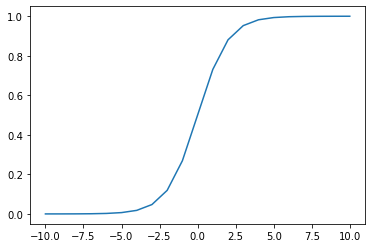

In [3]:
# Plot the input and output
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.show()

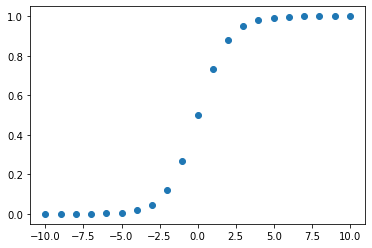

In [4]:
plt.scatter(X,Y)
plt.show()

### Logistic Regression   : Practical

In [5]:
# This necessary library used in data science 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [7]:
# How many rows and columns : 
data.shape

(1338, 8)

In [8]:
# To Check null values : 
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [10]:
# Here the target variable is " INSURANCECLAIM " which want to predict if customer claim insurance
# Means predict YES means 1 and NO means 0 
# This dataset is classification dataset, solve this dataset by classification algorithm

In [11]:
# First use Logistic Regression
# Seperate the Input (Indepedent Variable) and Output means Target variable 
X=data.drop("insuranceclaim",axis = 1)  # Input selection
Y = data["insuranceclaim"]  # Output

# or 
# X = data.iloc[:,:-1] # Select input
# Y = datat.iloc[:,-1] # Select Output

In [12]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [14]:
data["insuranceclaim"].unique()

array([1, 0], dtype=int64)

In [15]:
# Now we proceed
# Train_Test_Split
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1) # 70 - 30 split

In [17]:
X_train

,age,sex,bmi,children,smoker,region,charges
744,50,1,26.410,0,0,1,8827.20990
363,21,0,26.400,1,0,3,2597.77900
10,25,1,26.220,0,0,0,2721.32080
970,50,0,28.160,3,0,2,10702.64240
634,51,1,39.700,1,0,3,9391.34600
...,...,...,...,...,...,...,...
715,60,1,28.900,0,0,3,12146.97100
905,26,0,29.355,2,0,0,4564.19145
1096,51,0,34.960,2,1,0,44641.19740
235,40,0,22.220,2,1,2,19444.26580


In [18]:
X_test

,age,sex,bmi,children,smoker,region,charges
559,19,1,35.530,0,0,1,1646.42970
1087,57,1,31.540,0,0,1,11353.22760
1020,51,1,37.000,0,0,3,8798.59300
460,49,0,36.630,3,0,2,10381.47870
802,21,1,22.300,1,0,3,2103.08000
...,...,...,...,...,...,...,...
323,57,1,40.945,0,0,0,11566.30055
1268,20,0,33.300,0,0,3,1880.48700
134,20,0,28.785,0,0,0,2457.21115
1274,26,1,27.060,0,1,2,17043.34140


### Create a baseline Model  ( Logistic Regression )

In [19]:
from sklearn.linear_model import LogisticRegression
# Similar to LinearRegression

In [20]:
# Create object of Logistic Regression
lr = LogisticRegression()

In [21]:
# Theory of all Algorithm is Different but Practical will be same
# Train the model , use inbuilt method fit()
lr.fit(X_train,Y_train)

LogisticRegression()

In [22]:
# Test the model, use predict() inbuilt method of Logistic Regression.
# predict() : Y_pred = 1/(1+exp(-X))
Y_pred = lr.predict(X_test)  
# np.where (Y_predict >= 0.5 means 1 or 0) True = 1 and False = 0

In [23]:
Y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [24]:
d={"Actual Output": Y_test,"Predicted Output":Y_pred}
new_df = pd.DataFrame(d)
new_df.head(10)

,Actual Output,Predicted Output
559,1,1
1087,1,1
1020,1,1
460,0,0
802,0,0
298,1,1
481,1,0
616,1,1
763,1,1
750,1,1


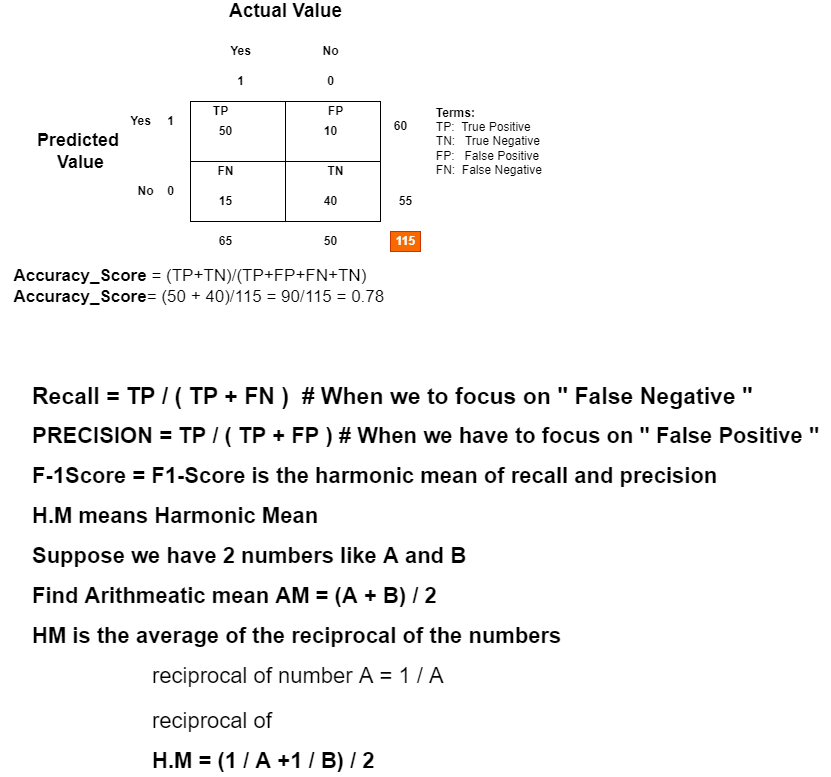

In [25]:
# Find out score, it is also known as Accuracy-Score
# Score()- inbuilt method of Logistic Regression
lr.score(X_test,Y_test)
# It nearest to 1 which means acuracy is very good.

0.8059701492537313

In [26]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [27]:
accuracy_score(Y_test,Y_pred)  # Similar to score() of Logistic Regression

0.8059701492537313

In [28]:
recall_score(Y_test,Y_pred)

0.8653061224489796

In [29]:
f1_score(Y_test,Y_pred)

0.8446215139442231

### classification_report() - inbuilt function which define in classification_report class

In [30]:
from sklearn.metrics import classification_report

In [31]:
classification_report(Y_test,Y_pred) # NOT CLEAR FOR READING

'              precision    recall  f1-score   support\n\n           0       0.77      0.71      0.74       157\n           1       0.82      0.87      0.84       245\n\n    accuracy                           0.81       402\n   macro avg       0.80      0.79      0.79       402\nweighted avg       0.80      0.81      0.80       402\n'

In [32]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.81       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.81      0.80       402



### Confusion Metrics 

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(confusion_matrix(Y_test,Y_pred))

[[112  45]
 [ 33 212]]


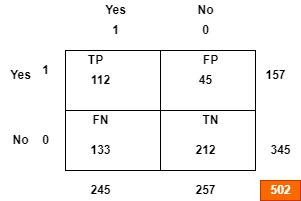

In [35]:
# Convert  2D array to 1D array , use inbuilt method ravel()
confusion_matrix(Y_test,Y_pred).ravel()

array([112,  45,  33, 212], dtype=int64)

In [36]:
TP,FP,FN,TN = confusion_matrix(Y_test,Y_pred).ravel()

In [37]:
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ", FP)
print("False Negative: ",FN)

True Positive:  112
True Negative:  212
False Positive:  45
False Negative:  33


# First Analysis
#### Feature selection : manually
#### Use visualisation for feature selection

In [38]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

###  we have categorical input data means categorical columns : sex ,children ,smoker,and region  : apply countplot() for data analysis 
### (countplot means frequency) and Numerical input columns : age,bmi,charges apply scatterplot()

In [39]:
data.shape

(1338, 8)

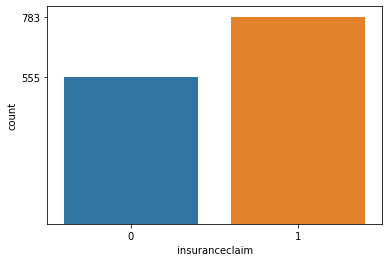

In [40]:
# First check how many customer to class the insurance means target variable insuranceclaim columns
sns.countplot(data=data,x="insuranceclaim")
c = data["insuranceclaim"].value_counts()
plt.yticks(c)
plt.show()

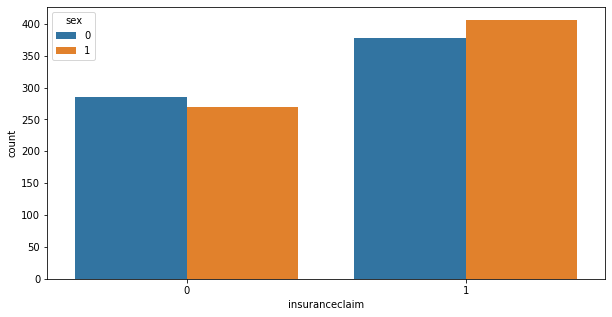

In [41]:
# First check sex is important input features or not to predict the output
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="insuranceclaim",hue="sex")
plt.show()

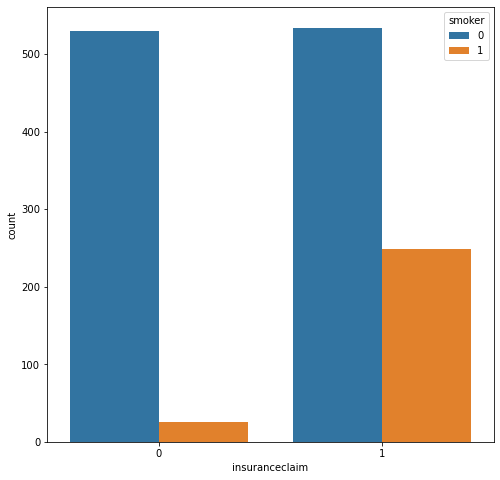

In [42]:
# Second check smoker is important input features or not , to predict the output
plt.figure(figsize=(8,8))
sns.countplot(data=data,x="insuranceclaim",hue="smoker")
plt.show()

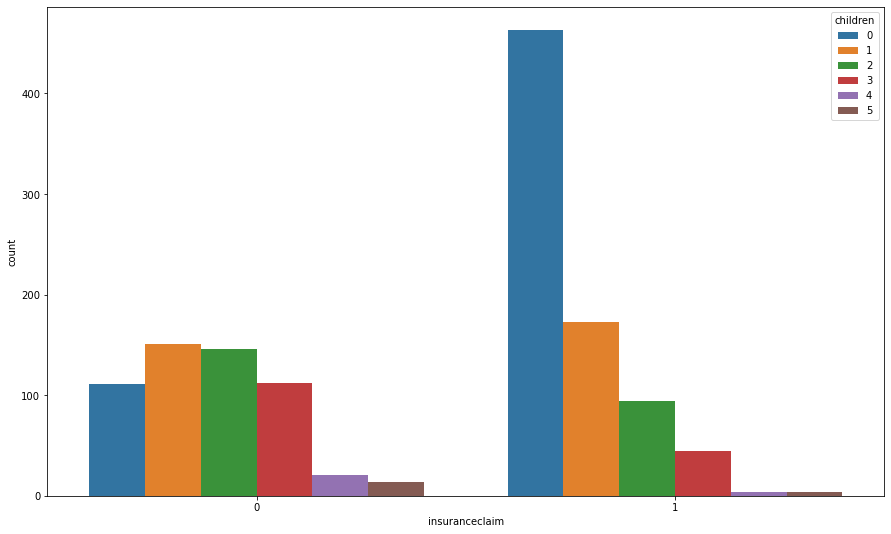

In [43]:
# Third check children is important input features or not , to predict the output
plt.figure(figsize=(15,9))
sns.countplot(data=data,x="insuranceclaim",hue="children")
plt.show()

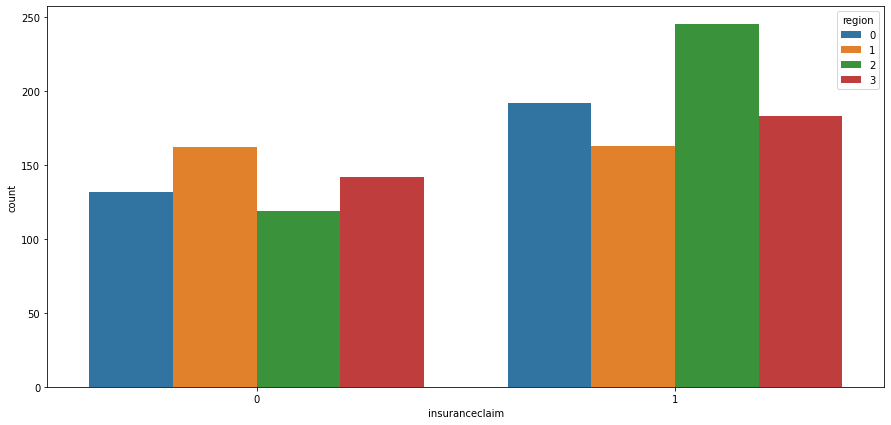

In [44]:
# fourth check region is important input features or not , to predict the output
plt.figure(figsize=(15,7))
sns.countplot(data=data,x="insuranceclaim",hue="region")
plt.show()

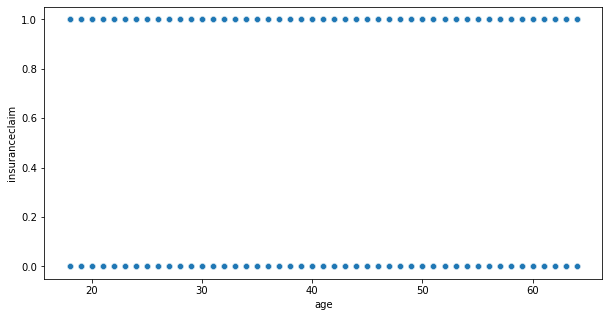

In [45]:
# Numerical input columns : age, bmi, charges apply scatterplot()
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="age",y="insuranceclaim")
plt.show()

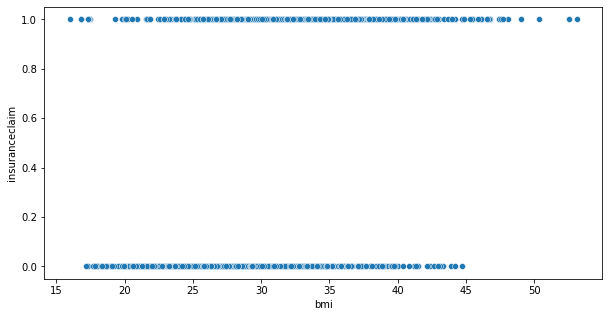

In [46]:
# Numerical input columns : age, bmi, charges apply scatterplot()
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="bmi",y="insuranceclaim")
plt.show()

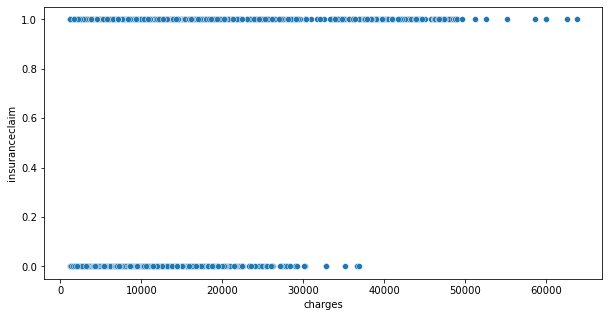

In [47]:
# Numerical input columns : age, bmi, charges apply scatterplot()
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="charges",y="insuranceclaim")
plt.show()

In [48]:
X=data[["bmi","charges","children","smoker"]]  # INPUT 2D
Y=data["insuranceclaim"] # 1D

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [50]:
lr=LogisticRegression()

In [51]:
# Train the model
lr.fit(X_train,Y_train)

LogisticRegression()

In [52]:
# Testing the model
Y_pred = lr.predict(X_test)

In [53]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       157
           1       0.79      0.87      0.82       245

    accuracy                           0.78       402
   macro avg       0.77      0.75      0.76       402
weighted avg       0.77      0.78      0.77       402



In [54]:
print(confusion_matrix(Y_test,Y_pred))

[[100  57]
 [ 33 212]]


# 27-12-2021

#### Decision Tree

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [56]:
# First use Logistic Regression
# Seperate the Input (Indepedent Variable) and Output means Target variable 
X=data.drop("insuranceclaim",axis = 1)  # Input selection
Y = data["insuranceclaim"]  # Output

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1) # 70 - 30 split

In [58]:
# Use DecisionTreeClassifier Alogrithms
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Create the object of class DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [60]:
# Train the model with 70 % Data: use inbuilt methods()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [61]:
# Test the model
Y_pred = dt.predict(X_test)

In [62]:
# Classification report 
print(classification_report(Y_test,Y_pred))
print("Confusion Matrix ")
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402

Confusion Matrix 
[[154   3]
 [  3 242]]


In [63]:
# Show important features
dt.feature_importances_ # By defaults it use information gain method

array([0.0701922 , 0.        , 0.42187374, 0.3335719 , 0.16581384,
       0.        , 0.00854832])

In [64]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

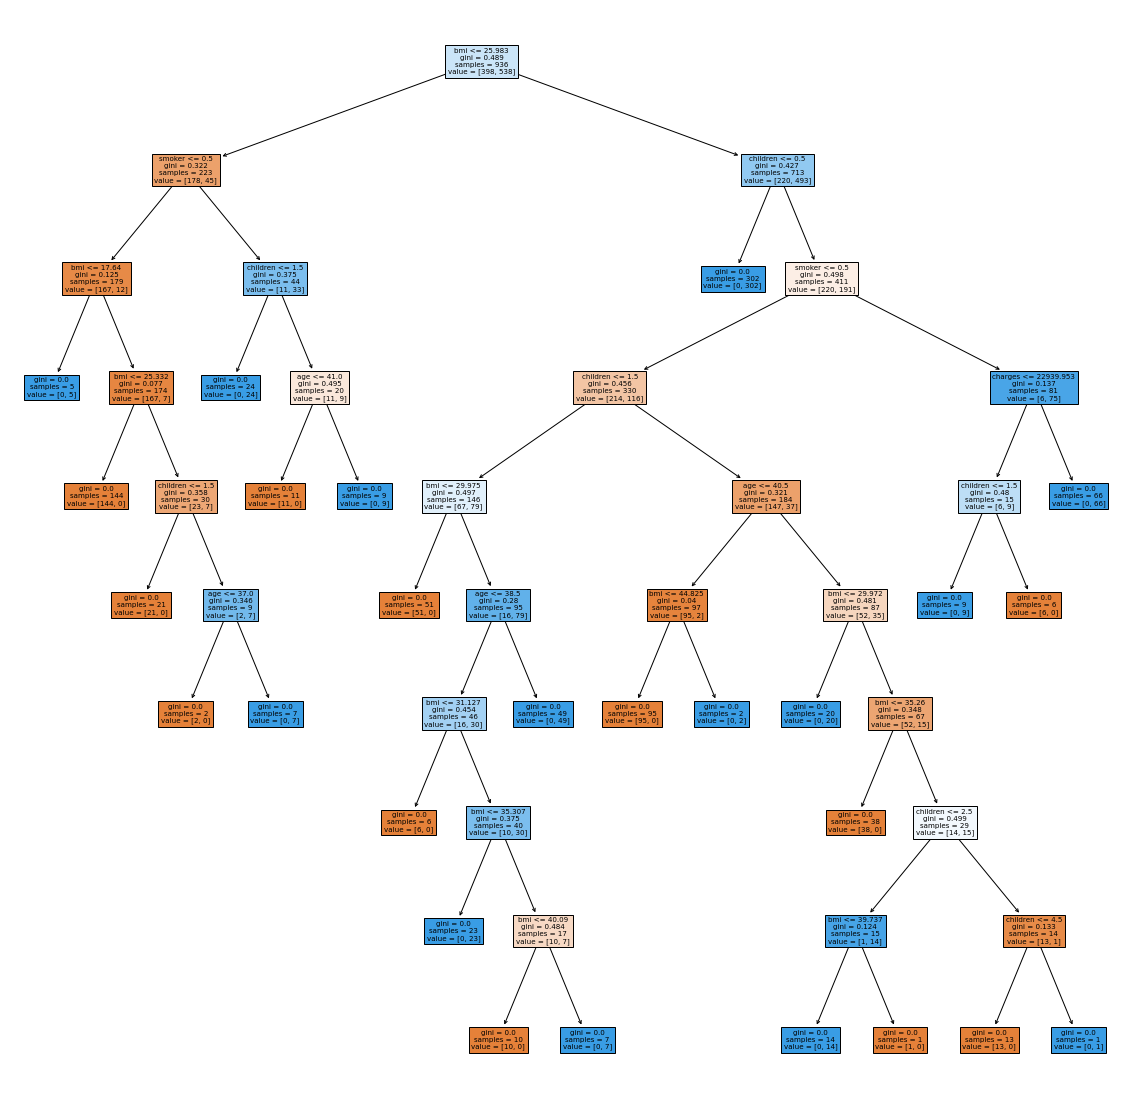

In [65]:
# Create Decision tree
from sklearn import tree
features = X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)